2. Termin – 14 stycznia 2024 r. Ilość punktów do zdobycia – 20 pkt.
Analiza eksploracyjna posiadanego zbioru/wycinka zbioru danych i postawienie tezy/zadania
badawczego mającego na celu opracowanie modelu regresji dla opisanych danych.

2. Celem analizy eksploracyjnej danych jest sprawdzenie zależności między posiadanymi danymi
(5 pkt.), zbadanie ich zakresów i stopnia zmienności (5 pkt.), analiza stopnia wypełnienia danych
(5 pkt.), wizualizacja (5 pkt.). Wynikiem tych analiz, ma być raport zakończony postawieniem
hipotezy badawczej mającej na celu znalezienie relacji między zmiennymi objaśniającymi, a
zmienną objaśnianą.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nutrition.csv') 
df

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


# Przygotowanie danych do analizy
* usunięcie zbędnych kolumn
* pozbycie się jednostek - zamiana na dane numeryczne
* obsługa rekordów z wartościami NaN - zamiana na zero lub usunięcie

In [3]:
df.drop(df.columns[0], axis=1, inplace=True) #usuwam kolumnę z indeksami
df.drop(df.columns[1], axis=1, inplace=True) #usuwam kolumnę z gramaturą (wszędzie 100 g)
df.drop('lucopene', axis=1, inplace=True) #likopen ma wszędzie wartość 0
df['vitamin_a'] = df['vitamin_a'].str.replace('mcg', "") #tu były zaśmiecone jednostki

In [4]:
g_cols = ['total_fat', 'saturated_fat', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 'alcohol', 'ash', 'water']
mg_cols = ['cholesterol', 'sodium', 'choline', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_b6', 'vitamin_c', 'vitamin_e', 'tocopherol_alpha', 'calcium', 'copper', 'irom', 'magnesium', 'manganese', 'phosphorous', 'potassium', 'zink', 'fatty_acids_total_trans', 'caffeine', 'theobromine']
mcg_cols = ['folate', 'folic_acid', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'vitamin_b12', 'vitamin_k', 'selenium']
iu_cols = ['vitamin_a', 'vitamin_d']

units_dict = {"g": g_cols, "mg": mg_cols, "mcg": mcg_cols, " IU": iu_cols}

for unit, cols in units_dict.items():
    for col in cols:
        df[col] = df[col].str.replace(unit, "")
        df[col].fillna(0, inplace=True)
        df[col] = df[col].astype(float)
        df.rename(columns={col: col + "_" + unit}, inplace=True)


In [5]:
df.iloc[:, 1:]

,calories,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,...,fat_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,caffeine_mg,theobromine_mg,water_g
0,381,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,...,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,...,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,25,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,...,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,...,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,...,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,125,3.5,1.4,62.0,54.0,64.5,4.0,0.0,6.422,0.356,...,3.50,1.353,1.554,0.244,62.0,0.0,1.11,0.0,0.0,72.51
8785,206,8.9,3.9,109.0,50.0,0.0,0.0,0.0,7.680,0.580,...,8.86,3.860,3.480,0.520,109.0,0.0,1.60,0.0,0.0,59.95
8786,277,23.0,12.0,78.0,39.0,0.0,1.0,0.0,6.550,0.520,...,22.74,11.570,8.720,0.980,78.0,0.0,0.92,0.0,0.0,59.80
8787,121,3.0,1.1,60.0,53.0,64.2,4.0,0.0,6.720,0.355,...,3.04,1.086,1.266,0.233,60.0,0.0,1.10,0.0,0.0,73.43


Podział na 3 zbiory: makroskładniki (białko, węgle, tłuszcze) + kalorie, makroskładniki (wyszczególnione) + kalorie, mikroskładniki + kalorie

In [13]:
df_macro_general = df[['name', 'calories', 'total_fat_g', 'protein_g','carbohydrate_g']]
df_macro_specific = df[['name', 'calories', 'saturated_fat_g', 'alanine_g','arginine_g', 'aspartic_acid_g', 'cystine_g', 'glutamic_acid_g','glycine_g', 'histidine_g', 'hydroxyproline_g', 'isoleucine_g','leucine_g', 'lysine_g', 'methionine_g', 'phenylalanine_g', 'proline_g','serine_g', 'threonine_g', 'tryptophan_g', 'tyrosine_g', 'valine_g','fiber_g', 'sugars_g', 'fructose_g', 'galactose_g','glucose_g', 'lactose_g', 'maltose_g', 'sucrose_g','saturated_fatty_acids_g', 'monounsaturated_fatty_acids_g','polyunsaturated_fatty_acids_g', 'fatty_acids_total_trans_mg','alcohol_g', 'ash_g', 'water_g']]
df_micro = df[['name', 'calories', 'cholesterol_mg', 'sodium_mg', 'choline_mg', 'folate_mcg', 'folic_acid_mcg', 'niacin_mg','pantothenic_acid_mg', 'riboflavin_mg', 'thiamin_mg', 'vitamin_a_ IU','vitamin_a_rae_mcg', 'carotene_alpha_mcg', 'carotene_beta_mcg','cryptoxanthin_beta_mcg', 'lutein_zeaxanthin_mcg', 'vitamin_b12_mcg','vitamin_b6_mg', 'vitamin_c_mg', 'vitamin_d_ IU', 'vitamin_e_mg','tocopherol_alpha_mg', 'vitamin_k_mcg', 'calcium_mg', 'copper_mg','irom_mg', 'magnesium_mg', 'manganese_mg', 'phosphorous_mg','potassium_mg', 'selenium_mcg', 'zink_mg', 'caffeine_mg', 'theobromine_mg']]

In [25]:
df_macro_general.describe()

,calories,total_fat_g,protein_g,carbohydrate_g
count,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,10.556855,11.345616,22.121915
std,169.862001,15.818247,10.530602,27.266261
min,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.000000,2.380000,0.050000
50%,191.000000,5.100000,8.020000,9.340000
75%,337.000000,14.000000,19.880000,34.910000
max,902.000000,100.000000,88.320000,100.000000


In [23]:
df_macro_specific.describe()

,calories,saturated_fat_g,alanine_g,arginine_g,aspartic_acid_g,cystine_g,glutamic_acid_g,glycine_g,histidine_g,hydroxyproline_g,...,lactose_g,maltose_g,sucrose_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,water_g
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,...,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,3.434281,0.486991,0.564506,0.768497,0.104868,1.459090,0.445260,0.270972,0.025559,...,0.132518,0.071506,0.577029,3.434146,3.772313,2.114332,38.723063,0.117522,1.717408,54.112074
std,169.862001,6.429758,0.659244,0.775294,1.044862,0.140665,1.818475,0.678858,0.366762,0.077800,...,1.844355,0.439321,3.952760,6.426586,6.826234,5.050045,117.358944,1.600127,2.967751,30.772999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.149000,0.074000,0.134000,0.000000,0.000000,0.770000,29.700000
50%,191.000000,1.400000,0.085000,0.097000,0.145000,0.017000,0.336000,0.064000,0.044000,0.000000,...,0.000000,0.000000,0.000000,1.435000,1.600000,0.591000,2.000000,0.000000,1.170000,63.080000
75%,337.000000,4.200000,1.034000,1.188000,1.617000,0.216000,2.989000,0.920000,0.544000,0.000000,...,0.000000,0.000000,0.000000,4.174000,4.760000,1.880000,65.000000,0.000000,2.020000,77.960000
max,902.000000,96.000000,8.009000,7.436000,10.203000,2.212000,17.452000,19.049000,2.999000,1.130000,...,56.000000,10.040000,99.800000,95.600000,83.689000,74.623000,3100.000000,42.500000,99.800000,100.000000


In [24]:
df_micro.describe()

,calories,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,riboflavin_mg,thiamin_mg,...,copper_mg,irom_mg,magnesium_mg,manganese_mg,phosphorous_mg,potassium_mg,selenium_mcg,zink_mg,caffeine_mg,theobromine_mg
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,...,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,38.723063,306.353851,23.681249,44.085561,17.638639,3.400145,0.484268,0.235364,0.207929,...,0.167482,2.645764,32.262032,0.495872,153.844123,265.251223,12.478280,1.939745,2.608829,4.695642
std,169.862001,117.358944,939.220468,51.332265,127.670410,100.736270,4.765302,1.251570,0.441263,0.510359,...,0.543426,5.661046,55.837795,6.301953,202.198353,371.443524,27.072684,3.335766,82.070233,60.962608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,0.000000,36.000000,0.000000,2.000000,0.000000,0.374000,0.000000,0.047000,0.030000,...,0.028000,0.490000,10.000000,0.000000,35.000000,111.000000,0.100000,0.220000,0.000000,0.000000
50%,191.000000,2.000000,84.000000,1.600000,9.000000,0.000000,2.111000,0.274000,0.151000,0.077000,...,0.077000,1.310000,20.000000,0.022000,129.000000,219.000000,4.000000,0.800000,0.000000,0.000000
75%,337.000000,65.000000,396.000000,29.400000,35.000000,0.000000,5.063000,0.626000,0.260000,0.227000,...,0.140000,2.570000,29.000000,0.222000,215.000000,329.000000,21.300000,2.660000,0.000000,0.000000
max,902.000000,3100.000000,38758.000000,2403.300000,3786.000000,2993.000000,127.500000,34.500000,17.500000,23.375000,...,15.050000,123.600000,781.000000,328.000000,9918.000000,16500.000000,1917.000000,90.950000,5714.000000,2634.000000


# Analiza rozkładu zmiennych - histogramy

In [108]:
# funkcja do wyświetlania histogramów dla każdej kolumny w danej ramce.
# możliwe wyświetlanie histogramów z nałożoną funkcją logarytmu (z wyłączeniem wartości zerowych).

def plot_histograms(df, log=False, bins=50):
    columns_to_plot = list(df.iloc[:, 1:].columns)    
    num_rows = (len(columns_to_plot) // 2) + (len(columns_to_plot) % 2) 
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    for i, col in enumerate(columns_to_plot):
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        if not log:
            axes[row_idx, col_idx].hist(df[col], bins=bins)
        else:
            axes[row_idx, col_idx].hist(np.log(df[col][df[col] != 0]), bins=bins)

        axes[row_idx, col_idx].set_title(f"column: {col} zeros:{(df[col] == 0).sum()}")
        
    plt.tight_layout()


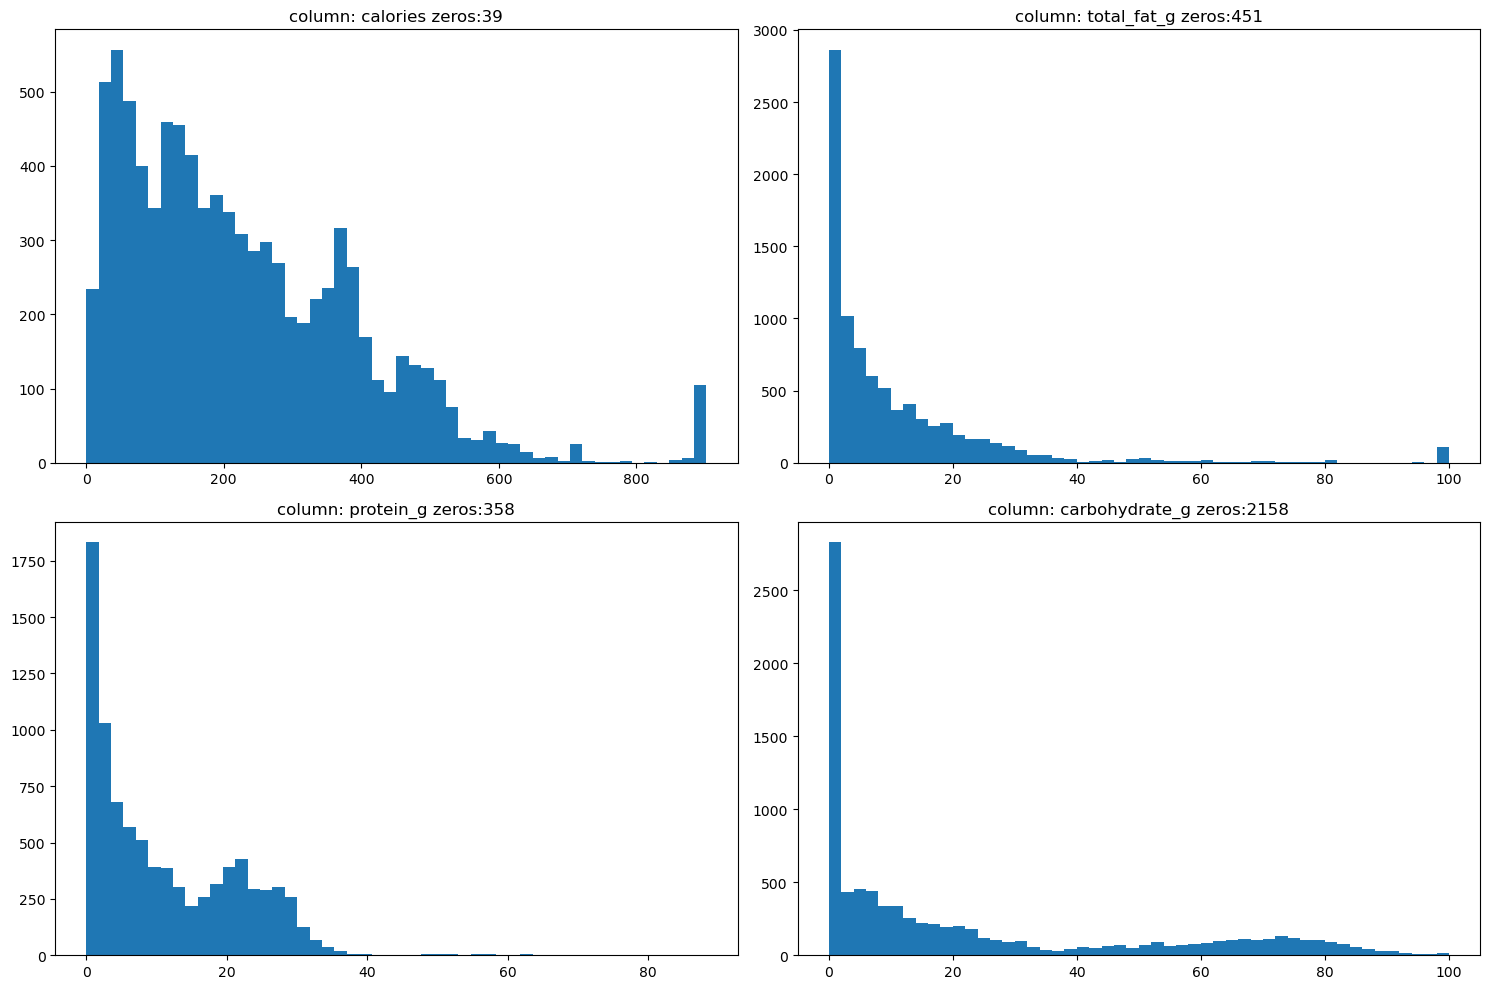

In [109]:
plot_histograms(df_macro_general)

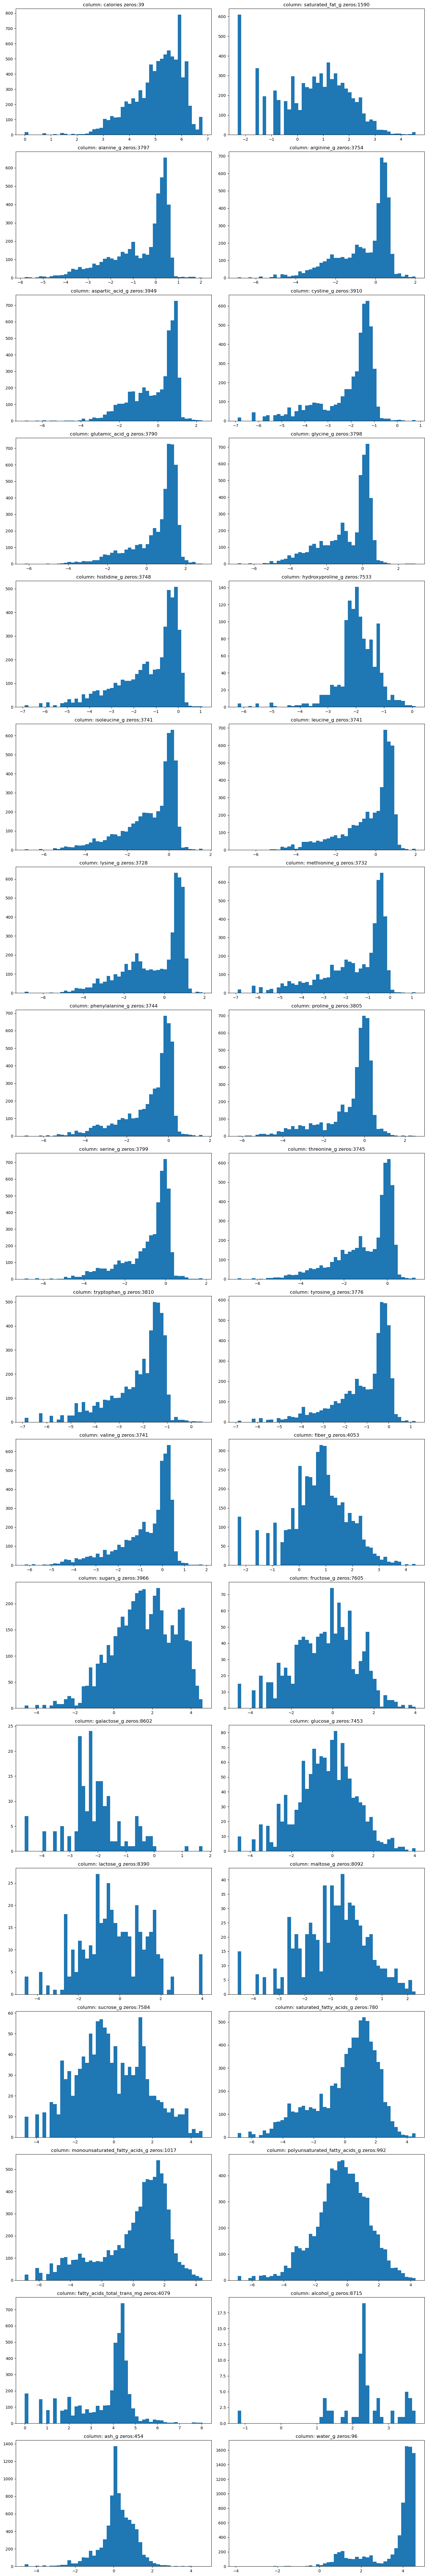

In [110]:
plot_histograms(df_macro_specific, log=True)

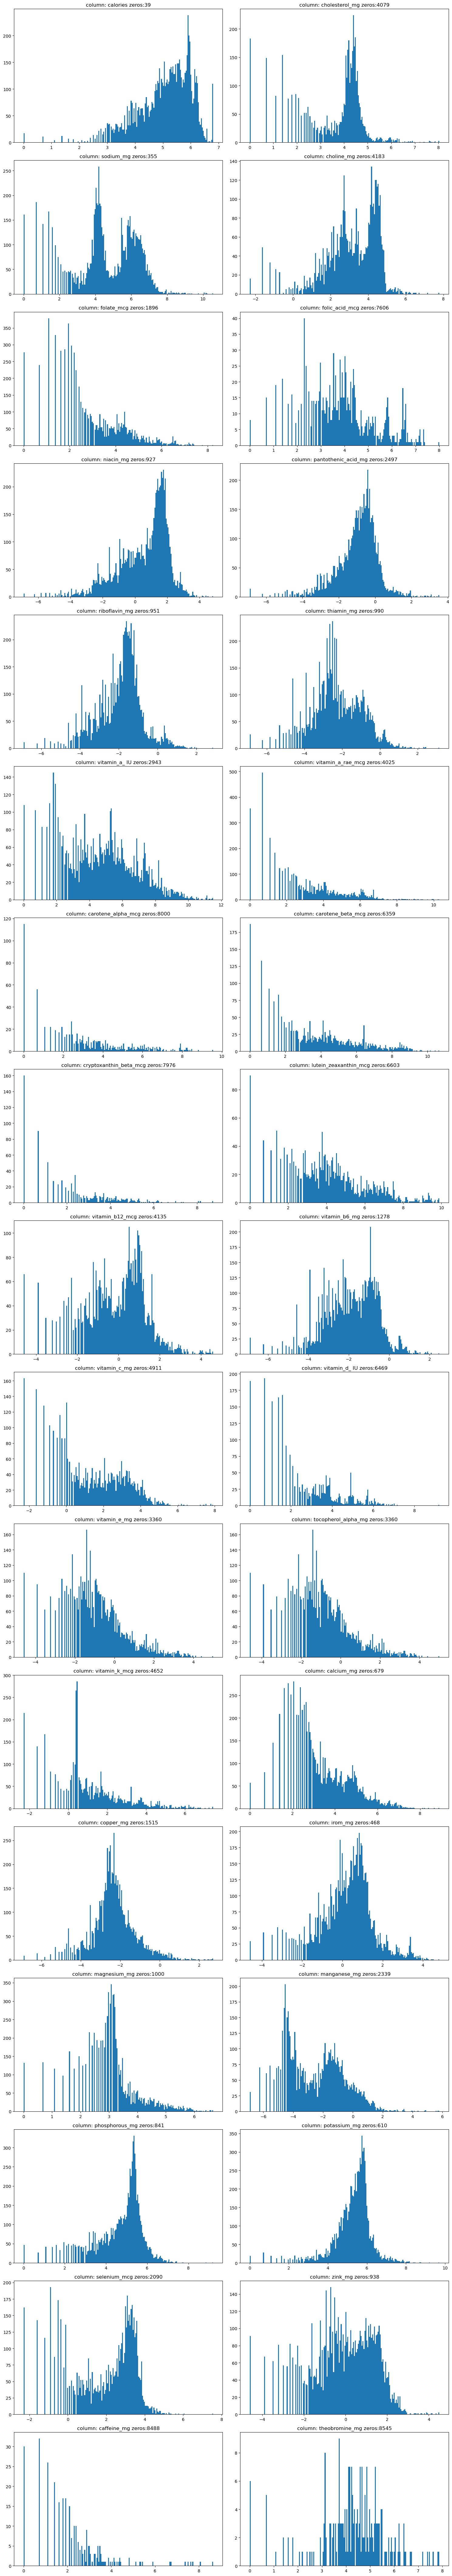

In [111]:
plot_histograms(df_micro, bins=200, log=True)

In [17]:
corr_macro_g = df_macro_general.iloc[:, 1:].corr()
corr_macro_g.style.background_gradient(cmap='coolwarm')

,calories,total_fat_g,protein_g,carbohydrate_g
calories,1.000000,0.806574,0.112888,0.492915
total_fat_g,0.806574,1.000000,0.062268,-0.048740
protein_g,0.112888,0.062268,1.000000,-0.303971
carbohydrate_g,0.492915,-0.048740,-0.303971,1.000000


In [21]:
corr_macro_s = df_macro_specific.iloc[:, 1:].corr()
corr_macro_s.style.background_gradient(cmap='coolwarm')

,calories,saturated_fat_g,alanine_g,arginine_g,aspartic_acid_g,cystine_g,glutamic_acid_g,glycine_g,histidine_g,hydroxyproline_g,isoleucine_g,leucine_g,lysine_g,methionine_g,phenylalanine_g,proline_g,serine_g,threonine_g,tryptophan_g,tyrosine_g,valine_g,fiber_g,sugars_g,fructose_g,galactose_g,glucose_g,lactose_g,maltose_g,sucrose_g,saturated_fatty_acids_g,monounsaturated_fatty_acids_g,polyunsaturated_fatty_acids_g,fatty_acids_total_trans_mg,alcohol_g,ash_g,water_g
calories,1.000000,0.619247,-0.000909,0.055370,0.019577,0.071754,0.074524,0.032836,-0.001619,-0.036477,0.007730,0.013983,-0.038445,-0.014965,0.047166,0.084735,0.052054,-0.004647,0.037332,0.017645,0.022227,0.202084,0.315696,-0.046279,0.001070,-0.018607,0.043173,0.057655,0.097398,0.619234,0.676905,0.595029,0.015153,-0.019040,0.083166,-0.900508
saturated_fat_g,0.619247,1.000000,0.044340,0.051470,0.034484,0.034344,0.055722,0.047647,0.056784,0.026796,0.054112,0.054699,0.053534,0.055075,0.052699,0.077479,0.054910,0.049187,0.052210,0.066797,0.061238,-0.075612,0.068899,-0.066249,0.001263,-0.044437,0.038673,-0.020732,0.008765,0.999910,0.519824,0.267414,0.091043,-0.036864,-0.023563,-0.368208
alanine_g,-0.000909,0.044340,1.000000,0.942007,0.935372,0.877476,0.919028,0.928007,0.951509,0.490606,0.956956,0.965862,0.962300,0.953147,0.943891,0.863161,0.942081,0.971234,0.887427,0.943504,0.957437,-0.182062,-0.312326,-0.106311,-0.020902,-0.096470,-0.045466,-0.069944,-0.075776,0.044184,0.093219,-0.064551,0.287297,-0.054108,0.001042,0.059684
arginine_g,0.055370,0.051470,0.942007,1.000000,0.928181,0.888135,0.935801,0.881350,0.924106,0.435656,0.934910,0.941474,0.907845,0.911900,0.951882,0.827437,0.942718,0.943291,0.905151,0.935722,0.937716,-0.111300,-0.299492,-0.103759,-0.013323,-0.092690,-0.045445,-0.063099,-0.063183,0.051358,0.143791,0.017866,0.259315,-0.053354,0.024063,0.001401
aspartic_acid_g,0.019577,0.034484,0.935372,0.928181,1.000000,0.896574,0.918771,0.831871,0.925989,0.457753,0.940009,0.942945,0.919437,0.889916,0.942169,0.825608,0.943260,0.942620,0.892919,0.932562,0.938124,-0.108741,-0.292463,-0.097826,-0.007079,-0.086081,-0.043018,-0.060257,-0.066782,0.034345,0.104406,-0.028500,0.252848,-0.053818,0.028683,0.025554
cystine_g,0.071754,0.034344,0.877476,0.888135,0.896574,1.000000,0.909635,0.765674,0.860013,0.405501,0.911475,0.905140,0.848344,0.874496,0.930531,0.800727,0.928882,0.900216,0.892801,0.898115,0.920134,-0.093970,-0.284682,-0.099202,-0.014213,-0.087881,-0.042316,-0.028954,-0.060228,0.034161,0.103979,-0.004978,0.275252,-0.054580,0.035258,-0.041786
glutamic_acid_g,0.074524,0.055722,0.919028,0.935801,0.918771,0.909635,1.000000,0.828040,0.931840,0.444561,0.948378,0.959189,0.905396,0.909907,0.971418,0.910782,0.963290,0.942246,0.920403,0.955473,0.953802,-0.111362,-0.300877,-0.102714,-0.000472,-0.092148,-0.040138,-0.017603,-0.061652,0.055600,0.118343,-0.019790,0.238155,-0.058608,0.039805,-0.038288
glycine_g,0.032836,0.047647,0.928007,0.881350,0.831871,0.765674,0.828040,1.000000,0.816868,0.462576,0.826157,0.836909,0.828135,0.812510,0.834748,0.871159,0.838496,0.842676,0.749843,0.807153,0.837004,-0.143959,-0.276588,-0.093839,-0.017111,-0.084798,-0.041497,-0.058583,-0.065020,0.047529,0.114183,-0.025842,0.245114,-0.048084,0.012421,0.020834
histidine_g,-0.001619,0.056784,0.951509,0.924106,0.925989,0.860013,0.931840,0.816868,1.000000,0.482413,0.969810,0.977653,0.974963,0.957509,0.950632,0.820476,0.933908,0.974082,0.909887,0.967137,0.962435,-0.184339,-0.310790,-0.106434,-0.016563,-0.095507,-0.043274,-0.064353,-0.077713,0.056648,0.095760,-0.068745,0.269838,-0.054066,0.001605,0.063883
hydroxyproline_g,-0.036477,0.026796,0.490606,0.435656,0.457753,0.405501,0.444561,0.462576,0.482413,1.000000,0.438116,0.461623,0.477907,0.455805,0.420046,0.418688,0.416876,0.456484,0.326022,0.439944,0.429682,-0.150161,-0.157109,-0.048077,-0.015651,-0.041075,-0.022481,-0.043332,-0.043877,0.026848,0.050294,-0.057670,0.125957,-0.024132,-0.031199,0.085406


In [20]:
corr_micro = df_micro.iloc[:, 1:].corr()
corr_micro.style.background_gradient(cmap='coolwarm')

,calories,cholesterol_mg,sodium_mg,choline_mg,folate_mcg,folic_acid_mcg,niacin_mg,pantothenic_acid_mg,riboflavin_mg,thiamin_mg,vitamin_a_ IU,vitamin_a_rae_mcg,carotene_alpha_mcg,carotene_beta_mcg,cryptoxanthin_beta_mcg,lutein_zeaxanthin_mcg,vitamin_b12_mcg,vitamin_b6_mg,vitamin_c_mg,vitamin_d_ IU,vitamin_e_mg,tocopherol_alpha_mg,vitamin_k_mcg,calcium_mg,copper_mg,irom_mg,magnesium_mg,manganese_mg,phosphorous_mg,potassium_mg,selenium_mcg,zink_mg,caffeine_mg,theobromine_mg
calories,1.000000,0.015153,0.055405,0.038763,0.183767,0.137879,0.174372,0.061523,0.154418,0.187053,-0.029758,0.025581,-0.053649,-0.086271,-0.021724,-0.089163,-0.014267,0.118680,-0.033269,0.074744,0.304744,0.304744,-0.024088,0.124456,0.102742,0.195025,0.262749,0.037255,0.200676,0.081798,0.061379,0.113362,0.022809,0.080254
cholesterol_mg,0.015153,1.000000,-0.018300,0.388495,-0.032441,-0.051275,0.082275,0.180859,0.127790,-0.035654,0.085757,0.153123,-0.023028,-0.041802,-0.013337,-0.030235,0.322310,0.034698,-0.028347,0.064323,-0.037682,-0.037682,-0.042061,-0.036795,0.112174,0.005918,-0.061651,0.002213,0.143567,0.003896,0.214084,0.119902,-0.009952,-0.021517
sodium_mg,0.055405,-0.018300,1.000000,0.015339,0.043693,0.043870,0.022992,-0.001311,0.049161,0.070008,-0.008160,-0.004721,-0.001559,-0.009342,0.002649,-0.015776,-0.011339,-0.003370,-0.016445,0.004788,0.008388,0.008388,-0.011605,0.176472,-0.014583,0.029297,0.004126,-0.003916,0.117084,0.004308,0.014679,-0.023267,-0.005986,-0.002841
choline_mg,0.038763,0.388495,0.015339,1.000000,0.020870,-0.014413,0.164199,0.226652,0.150386,0.021686,0.041793,0.096609,-0.006862,-0.015672,0.005250,0.008299,0.187962,0.147390,-0.022126,0.093697,0.034126,0.034126,0.008072,0.023716,0.163810,0.035100,0.074271,0.014322,0.226289,0.139922,0.270493,0.238568,0.026219,0.003032
folate_mcg,0.183767,-0.032441,0.043693,0.020870,1.000000,0.802550,0.554975,0.309546,0.607117,0.572999,0.111959,0.125388,-0.005057,0.011902,-0.000450,0.045448,0.173214,0.567137,0.066626,0.078759,0.206610,0.206610,0.043039,0.162628,0.147219,0.531806,0.280568,0.050724,0.144704,0.128866,0.023079,0.343343,-0.000549,0.002385
folic_acid_mcg,0.137879,-0.051275,0.043870,-0.014413,0.802550,1.000000,0.521408,0.242211,0.523110,0.481643,0.029443,0.049099,-0.007980,-0.016800,-0.008166,0.014143,0.120108,0.538483,0.048297,0.090022,0.179184,0.179184,-0.012109,0.128065,0.026638,0.438240,0.130917,0.041813,0.069663,0.011991,0.020372,0.316173,-0.004257,0.009355
niacin_mg,0.174372,0.082275,0.022992,0.164199,0.554975,0.521408,1.000000,0.477920,0.741010,0.594961,0.096252,0.149538,-0.023949,-0.038898,0.005263,-0.033524,0.277694,0.710280,0.174605,0.101552,0.192891,0.192891,-0.038471,0.134538,0.145290,0.495338,0.274656,0.097383,0.266535,0.202715,0.192544,0.477124,0.057808,-0.014755
pantothenic_acid_mg,0.061523,0.180859,-0.001311,0.226652,0.309546,0.242211,0.477920,1.000000,0.461420,0.286041,0.169882,0.227516,-0.005983,-0.007605,0.003596,-0.014789,0.353941,0.405266,0.069365,0.076764,0.321212,0.321212,-0.011249,0.155057,0.289326,0.221150,0.233279,0.234518,0.228149,0.145974,0.163484,0.371608,0.029411,-0.003313
riboflavin_mg,0.154418,0.127790,0.049161,0.150386,0.607117,0.523110,0.741010,0.461420,1.000000,0.628433,0.292440,0.326529,-0.008899,0.004179,0.019173,0.010733,0.435578,0.573479,0.191895,0.090250,0.156005,0.156005,0.012319,0.224614,0.307650,0.500119,0.227190,0.104390,0.230204,0.196399,0.150268,0.368320,0.015111,0.016598
thiamin_mg,0.187053,-0.035654,0.070008,0.021686,0.572999,0.481643,0.594961,0.286041,0.628433,1.000000,0.041095,0.051378,0.005573,-0.007245,-0.000854,-0.004489,0.097152,0.408751,0.045105,0.059506,0.117363,0.117363,-0.010021,0.137440,0.102749,0.395832,0.245585,0.046124,0.179083,0.118403,0.060844,0.247918,-0.011236,-0.007153


In [64]:
#do wizualizacji
#pca tsne